# Employee Turnover prediction
About data set,
- Satisfaction (satisfaction_level)
- Last review (last_evaluation)
- Number of projects done by employees (number_project)
- Average working hours per month (average_montly_hours)
- Entry Time (time_spend_company)
- Whether there is a work accident (Work_accident)
- Have you been promoted in the last five years (promotion_last_5years)
- Staff department (department)
- Salary level (salary)
- Resign (left)

In [1]:
#packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import f1_score,precision_score,recall_score

import warnings
warnings.filterwarnings('ignore')

pd.pandas.set_option('display.max_columns',None)
pd.pandas.set_option('display.max_rows',None)

In [2]:
# importing dataset
df=pd.read_csv('Emp_TurnOver.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
df.shape

(14999, 10)

In [4]:
#renaming columns
df=df.rename(columns={'sales':'Department'})

In [5]:
#encoding
cols=['Department','salary']
for i in cols:
    df[i]=df[i].factorize()[0]

In [6]:
#splitting into X,y
X=df.drop(['left'],axis=1)
y=df['left']

In [7]:
#standardization
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=42)
scaler=StandardScaler().fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [8]:
#converting imbalanced into balanced 
sm=SMOTE()
X_train_SM,y_train_SM=sm.fit_resample(X_train,y_train)

In [13]:
print('Before {}'.format(Counter(y_train)))
print('After {}'.format(Counter(y_train_SM)))

Before Counter({0: 8000, 1: 2499})
After Counter({1: 8000, 0: 8000})


# Model Evaluation

In [14]:
#1.LogisticRegression
LogisticRegression=LogisticRegression().fit(X_train_SM,y_train_SM)
LogisticRegression_pred=LogisticRegression.predict(X_test)

In [16]:
Logistic_Accuracy=accuracy_score(y_test,LogisticRegression_pred)
Logistic_Precision=precision_score(y_test,LogisticRegression_pred)
Logistic_Recall=recall_score(y_test,LogisticRegression_pred)
Logistic_f1Score=f1_score(y_test,LogisticRegression_pred)
Logistic_RocAuc=roc_auc_score(y_test,LogisticRegression_pred)

In [17]:
print('Logistic_Accuracy : {}'.format(Logistic_Accuracy))
print('Logistic_Precision : {}'.format(Logistic_Precision))
print('Logistic_Recall : {}'.format(Logistic_Recall))
print('Logistic_f1Score : {}'.format(Logistic_f1Score))
print('Logistic_RocAuc : {}'.format(Logistic_RocAuc))

Logistic_Accuracy : 0.7571111111111111
Logistic_Precision : 0.4940102681118083
Logistic_Recall : 0.8078358208955224
Logistic_f1Score : 0.6130973451327434
Logistic_RocAuc : 0.7745421811595465


In [18]:
#2.DecisionTreeClassifier
DTreeClassifier=DecisionTreeClassifier().fit(X_train,y_train)
DTreeClassifier_Pred=DTreeClassifier.predict(X_test)

In [19]:
DT_Accuracy=accuracy_score(y_test,DTreeClassifier_Pred)
DT_Precision=precision_score(y_test,DTreeClassifier_Pred)
DT_Recall=recall_score(y_test,DTreeClassifier_Pred)
DT_f1Score=f1_score(y_test,DTreeClassifier_Pred)
DT_RocAuc=roc_auc_score(y_test,DTreeClassifier_Pred)

In [20]:
print('DT_Accuracy : {}'.format(DT_Accuracy))
print('DT_Precision : {}'.format(DT_Precision))
print('DT_Recall : {}'.format(DT_Recall))
print('DT_f1Score : {}'.format(DT_f1Score))
print('DT_RocAuc : {}'.format(DT_RocAuc))

DT_Accuracy : 0.9742222222222222
DT_Precision : 0.9321880650994575
DT_Recall : 0.9617537313432836
DT_f1Score : 0.9467401285583105
DT_RocAuc : 0.9699375424511051


In [21]:
#3.RandomForestClassifier
RFClassifier=RandomForestClassifier().fit(X_train,y_train)
RFClassifier_pred=RFClassifier.predict(X_test)

In [22]:
RF_Accuracy=accuracy_score(y_test,RFClassifier_pred)
RF_Precision=precision_score(y_test,RFClassifier_pred)
RF_Recall=recall_score(y_test,RFClassifier_pred)
RF_f1Score=f1_score(y_test,RFClassifier_pred)
RF_RocAuc=roc_auc_score(y_test,RFClassifier_pred)

In [23]:
print('RF_Accuracy : {}'.format(RF_Accuracy))
print('RF_Precision : {}'.format(RF_Precision))
print('RF_Recall : {}'.format(RF_Recall))
print('RF_f1Score : {}'.format(RF_f1Score))
print('RF_RocAuc : {}'.format(RF_RocAuc))

RF_Accuracy : 0.9884444444444445
RF_Precision : 0.9922779922779923
RF_Recall : 0.9589552238805971
RF_f1Score : 0.9753320683111955
RF_RocAuc : 0.9783107507967747


In [24]:
#4.AdaBoostClassifier
AdaBoostClassifier=AdaBoostClassifier().fit(X_train,y_train)
AdaBoostClassifier_pred=AdaBoostClassifier.predict(X_test)

In [25]:
AdaBoost_Accuracy=accuracy_score(y_test,AdaBoostClassifier_pred)
AdaBoost_Precision=precision_score(y_test,AdaBoostClassifier_pred)
AdaBoost_Recall=recall_score(y_test,AdaBoostClassifier_pred)
AdaBoost_f1Score=f1_score(y_test,AdaBoostClassifier_pred)
AdaBoost_RocAuc=roc_auc_score(y_test,AdaBoostClassifier_pred)

print('AdaBoost_Accuracy : {}'.format(AdaBoost_Accuracy))
print('AdaBoost_Precision : {}'.format(AdaBoost_Precision))
print('AdaBoost_Recall : {}'.format(AdaBoost_Recall))
print('AdaBoost_f1Score : {}'.format(AdaBoost_f1Score))
print('AdaBoost_RocAuc : {}'.format(AdaBoost_RocAuc))

AdaBoost_Accuracy : 0.9582222222222222
AdaBoost_Precision : 0.9225621414913958
AdaBoost_Recall : 0.9001865671641791
AdaBoost_f1Score : 0.91123701605288
AdaBoost_RocAuc : 0.9382788145039099


In [26]:
#5.KNeighborsClassifier
KNNClassifier=KNeighborsClassifier().fit(X_train,y_train)
KNNClassifier_pred=KNNClassifier.predict(X_test)

In [27]:
KNN_Accuracy=accuracy_score(y_test,KNNClassifier_pred)
KNN_Precision=precision_score(y_test,KNNClassifier_pred)
KNN_Recall=recall_score(y_test,KNNClassifier_pred)
KNN_f1Score=f1_score(y_test,KNNClassifier_pred)
KNN_RocAuc=roc_auc_score(y_test,KNNClassifier_pred)

print('KNN_Accuracy : {}'.format(KNN_Accuracy))
print('KNN_Precision : {}'.format(KNN_Precision))
print('KNN_Recall : {}'.format(KNN_Recall))
print('KNN_f1Score : {}'.format(KNN_f1Score))
print('KNN_RocAuc : {}'.format(KNN_RocAuc))

KNN_Accuracy : 0.9526666666666667
KNN_Precision : 0.8980537534754403
KNN_Recall : 0.9039179104477612
KNN_f1Score : 0.900976290097629
KNN_RocAuc : 0.9359146145004267


In [28]:
#6.GaussianNB
GaussianNB=GaussianNB().fit(X_train,y_train)
GaussianNB_pred=GaussianNB.predict(X_test)

In [29]:
NB_Accuracy=accuracy_score(y_test,GaussianNB_pred)
NB_Precision=precision_score(y_test,GaussianNB_pred)
NB_Recall=recall_score(y_test,GaussianNB_pred)
NB_f1Score=f1_score(y_test,GaussianNB_pred)
NB_RocAuc=roc_auc_score(y_test,GaussianNB_pred)

print('NB_Accuracy : {}'.format(NB_Accuracy))
print('NB_Precision : {}'.format(NB_Precision))
print('NB_Recall : {}'.format(NB_Recall))
print('NB_f1Score : {}'.format(NB_f1Score))
print('NB_RocAuc : {}'.format(NB_RocAuc))

NB_Accuracy : 0.7926666666666666
NB_Precision : 0.5496074232690935
NB_Recall : 0.7182835820895522
NB_f1Score : 0.6227254346947029
NB_RocAuc : 0.7671056183493269


In [30]:
#7.SVC
SVC=SVC().fit(X_train,y_train)
SVC_pred=SVC.predict(X_test)

In [31]:
SVC_Accuracy=accuracy_score(y_test,SVC_pred)
SVC_Precision=precision_score(y_test,SVC_pred)
SVC_Recall=recall_score(y_test,SVC_pred)
SVC_f1Score=f1_score(y_test,SVC_pred)
SVC_RocAuc=roc_auc_score(y_test,SVC_pred)

print('SVC_Accuracy : {}'.format(SVC_Accuracy))
print('SVC_Precision : {}'.format(SVC_Precision))
print('SVC_Recall : {}'.format(SVC_Recall))
print('SVC_f1Score : {}'.format(SVC_f1Score))
print('SVC_RocAuc : {}'.format(SVC_RocAuc))

SVC_Accuracy : 0.9577777777777777
SVC_Precision : 0.9289883268482491
SVC_Recall : 0.8908582089552238
SVC_f1Score : 0.9095238095238095
SVC_RocAuc : 0.9347814965429562


In [32]:
#8.XGBClassifier
XGBClassifier=XGBClassifier().fit(X_train,y_train)
XGB_pred=XGBClassifier.predict(X_test)

[18:34:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [33]:
XGB_Accuracy=accuracy_score(y_test,XGB_pred)
XGB_Precision=precision_score(y_test,XGB_pred)
XGB_Recall=recall_score(y_test,XGB_pred)
XGB_f1Score=f1_score(y_test,XGB_pred)
XGB_RocAuc=roc_auc_score(y_test,XGB_pred)

print('XGB_Accuracy : {}'.format(XGB_Accuracy))
print('XGB_Precision : {}'.format(XGB_Precision))
print('XGB_Recall : {}'.format(XGB_Recall))
print('XGB_f1Score : {}'.format(XGB_f1Score))
print('XGB_RocAuc : {}'.format(XGB_RocAuc))

XGB_Accuracy : 0.9855555555555555
XGB_Precision : 0.9808978032473734
XGB_Recall : 0.9580223880597015
XGB_f1Score : 0.9693251533742331
XGB_RocAuc : 0.9760940411710409


In [34]:
#visualizing accuracy
models=np.array(['LogisticRegression','DecisionTreeClassifier','RandomForestClassifier','AdaBoostClassifier','KNeighborsClassifier','GaussianNB','SVC','XGBClassifier'])
scores=np.array([Logistic_Accuracy,DT_Accuracy,RF_Accuracy,AdaBoost_Accuracy,KNN_Accuracy,NB_Accuracy,SVC_Accuracy,XGB_Accuracy])

<BarContainer object of 8 artists>

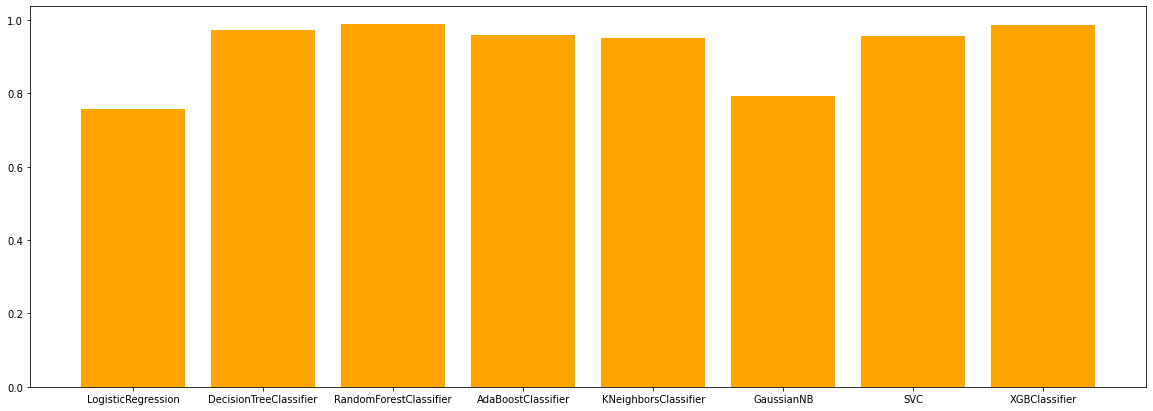

In [36]:
plt.figure(figsize=(20,7))
plt.bar(models,scores,color='orange')

- Clearly we can say that among all classification algorithms RandomForestClassifier gives more accuracy 0.9884, approximately 98%. 
- At the same time XGBoostClassifier gives same accuracy but there is a little bit change in points 0.9855, approximately also 98%.
------------------------------------------------------------------------------------------------------------------------------

# Hyper parameter tuning

- As we know, for our data RandomForestClassifier gives more accuracy. So I'm going to choose RandomForestClassifier for the next further implementation.

In [44]:
params={'n_estimators':[int(a) for a in np.linspace(start=10,stop=1000,num=10)],
       'max_depth':[int(b) for b in np.linspace(start=5,stop=30,num=6)],
       'max_features':["auto", "sqrt", "log2"],
       'min_samples_split':[5,10,15,20,17],
        'min_samples_leaf':[2,4,6,8],
       'criterion' : ["gini", "entropy"]}

In [45]:
RF_Model=RandomForestClassifier()
Hyper_RF=RandomizedSearchCV(estimator=RF_Model,param_distributions=params,n_iter=100,cv=5,random_state=42,n_jobs=1,verbose=2)

In [46]:
Hyper_RF.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END criterion=gini, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=17, n_estimators=890; total time=  11.1s
[CV] END criterion=gini, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=17, n_estimators=890; total time=  11.1s
[CV] END criterion=gini, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=17, n_estimators=890; total time=  10.2s
[CV] END criterion=gini, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=17, n_estimators=890; total time=  10.2s
[CV] END criterion=gini, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=17, n_estimators=890; total time=  10.2s
[CV] END criterion=gini, max_depth=25, max_features=auto, min_samples_leaf=6, min_samples_split=20, n_estimators=120; total time=   1.5s
[CV] END criterion=gini, max_depth=25, max_features=auto, min_samples_leaf=6, min_samples_split=20, n_estimators=12

[CV] END criterion=gini, max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=15, n_estimators=670; total time=   7.7s
[CV] END criterion=gini, max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=15, n_estimators=670; total time=   7.5s
[CV] END criterion=gini, max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=15, n_estimators=670; total time=   7.7s
[CV] END criterion=gini, max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=15, n_estimators=670; total time=   7.6s
[CV] END criterion=gini, max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=15, n_estimators=670; total time=   7.8s
[CV] END criterion=gini, max_depth=25, max_features=log2, min_samples_leaf=6, min_samples_split=20, n_estimators=1000; total time=  11.0s
[CV] END criterion=gini, max_depth=25, max_features=log2, min_samples_leaf=6, min_samples_split=20, n_estimators=1000; total time=  11.6s
[CV] END criterion=gini, max_depth=25, 

[CV] END criterion=entropy, max_depth=25, max_features=sqrt, min_samples_leaf=6, min_samples_split=20, n_estimators=230; total time=   2.7s
[CV] END criterion=entropy, max_depth=25, max_features=sqrt, min_samples_leaf=6, min_samples_split=20, n_estimators=230; total time=   2.8s
[CV] END criterion=entropy, max_depth=25, max_features=sqrt, min_samples_leaf=6, min_samples_split=20, n_estimators=230; total time=   2.5s
[CV] END criterion=entropy, max_depth=25, max_features=sqrt, min_samples_leaf=6, min_samples_split=20, n_estimators=230; total time=   2.5s
[CV] END criterion=entropy, max_depth=25, max_features=sqrt, min_samples_leaf=6, min_samples_split=20, n_estimators=230; total time=   2.5s
[CV] END criterion=gini, max_depth=25, max_features=auto, min_samples_leaf=6, min_samples_split=20, n_estimators=450; total time=   5.0s
[CV] END criterion=gini, max_depth=25, max_features=auto, min_samples_leaf=6, min_samples_split=20, n_estimators=450; total time=   4.8s
[CV] END criterion=gini, m

[CV] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=15, n_estimators=560; total time=   6.7s
[CV] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=15, n_estimators=560; total time=   6.8s
[CV] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=15, n_estimators=560; total time=   6.3s
[CV] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=15, n_estimators=560; total time=   6.4s
[CV] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=15, n_estimators=560; total time=   6.3s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=6, min_samples_split=20, n_estimators=230; total time=   1.7s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=6, min_samples_split=20, n_estimators=230; total time=   1.7s
[CV] END criterion=gini, max_depth=5, max_f

[CV] END criterion=gini, max_depth=25, max_features=sqrt, min_samples_leaf=4, min_samples_split=17, n_estimators=1000; total time=  11.4s
[CV] END criterion=gini, max_depth=25, max_features=sqrt, min_samples_leaf=4, min_samples_split=17, n_estimators=1000; total time=  11.8s
[CV] END criterion=gini, max_depth=25, max_features=sqrt, min_samples_leaf=4, min_samples_split=17, n_estimators=1000; total time=  12.9s
[CV] END criterion=gini, max_depth=25, max_features=sqrt, min_samples_leaf=4, min_samples_split=17, n_estimators=1000; total time=  13.8s
[CV] END criterion=gini, max_depth=25, max_features=sqrt, min_samples_leaf=4, min_samples_split=17, n_estimators=1000; total time=  12.7s
[CV] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=15, n_estimators=560; total time=   4.8s
[CV] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=15, n_estimators=560; total time=   4.4s
[CV] END criterion=entropy, max_

[CV] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=20, n_estimators=560; total time=   4.4s
[CV] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=20, n_estimators=560; total time=   4.3s
[CV] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=20, n_estimators=560; total time=   4.5s
[CV] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=20, n_estimators=560; total time=   4.3s
[CV] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=20, n_estimators=560; total time=   4.8s
[CV] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=20, n_estimators=10; total time=   0.1s
[CV] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=20, n_estimators=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=15, 

[CV] END criterion=gini, max_depth=30, max_features=log2, min_samples_leaf=6, min_samples_split=20, n_estimators=450; total time=   6.5s
[CV] END criterion=gini, max_depth=30, max_features=log2, min_samples_leaf=6, min_samples_split=20, n_estimators=450; total time=   5.4s
[CV] END criterion=gini, max_depth=30, max_features=log2, min_samples_leaf=6, min_samples_split=20, n_estimators=450; total time=   4.9s
[CV] END criterion=gini, max_depth=30, max_features=log2, min_samples_leaf=6, min_samples_split=20, n_estimators=450; total time=   5.2s
[CV] END criterion=gini, max_depth=30, max_features=log2, min_samples_leaf=6, min_samples_split=20, n_estimators=450; total time=   5.0s
[CV] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=6, min_samples_split=15, n_estimators=780; total time=  11.9s
[CV] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=6, min_samples_split=15, n_estimators=780; total time=  11.2s
[CV] END criterion=gini, max_depth=20, ma

[CV] END criterion=entropy, max_depth=25, max_features=auto, min_samples_leaf=6, min_samples_split=10, n_estimators=890; total time=  13.5s
[CV] END criterion=entropy, max_depth=25, max_features=auto, min_samples_leaf=6, min_samples_split=10, n_estimators=890; total time=  14.7s
[CV] END criterion=entropy, max_depth=25, max_features=auto, min_samples_leaf=6, min_samples_split=10, n_estimators=890; total time=  10.8s
[CV] END criterion=entropy, max_depth=25, max_features=auto, min_samples_leaf=6, min_samples_split=10, n_estimators=890; total time=  12.3s
[CV] END criterion=entropy, max_depth=25, max_features=auto, min_samples_leaf=6, min_samples_split=10, n_estimators=890; total time=  11.7s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=10; total time=   0.0s
[CV] END criterion=entro

[CV] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=340; total time=   2.6s
[CV] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=340; total time=   2.6s
[CV] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=340; total time=   2.6s
[CV] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=340; total time=   2.8s
[CV] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=340; total time=   2.6s
[CV] END criterion=entropy, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=890; total time=  10.4s
[CV] END criterion=entropy, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=890; total time=  10.6s
[CV] END criterion=entropy, max_

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [2, 4, 6, 8],
                                        'min_samples_split': [5, 10, 15, 20,
                                                              17],
                                        'n_estimators': [10, 120, 230, 340, 450,
                                                         560, 670, 780, 890,
                                                         1000]},
                   random_state=42, verbose=2)

In [48]:
print("The best parameters : {}".format(Hyper_RF.best_params_ ))

The best parameters : {'n_estimators': 1000, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 30, 'criterion': 'entropy'}


In [49]:
RF_prediction=Hyper_RF.predict(X_test)

In [50]:
print('Accuray after Hyper parameter tuning : {}'.format(accuracy_score(y_test,RF_prediction)))

Accuray after Hyper parameter tuning : 0.9802222222222222


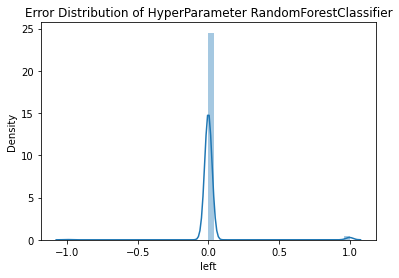

In [56]:
sns.distplot(y_test-RF_prediction)
plt.title('Error Distribution of HyperParameter RandomForestClassifier')
plt.show()

### Checking this model using new data

In [93]:
new_emp=[0.80,.65,4,262,7,0,0,1,1] 
print(Hyper_RF.predict([new_emp]))

[0]


- For this employee, there is a chance to continue his/her job.
---------------------------------------------

In [94]:
import pickle
file=open('RF_Model.pkl','wb')
pickle.dump(Hyper_RF,file)